In [6]:
import os
import glob

import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
from PIL import Image

#import torch
from torch import nn, optim, functional
from torchvision.transforms import v2
from torchvision.utils import make_grid

from torch.utils.data import Dataset, DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

random.seed(15)

### Import film and digital data

In [ ]:
def dataset_splitting(data_paths, split_portions):
    full_amnt = len(data_paths)
    
    train_amnt = int(split_portions[0] * full_amnt)
    val_amnt = int(split_portions[1] * full_amnt)
    test_amnt = int(split_portions[2] * full_amnt)

    assert train_amnt + val_amnt + test_amnt == 1.0, "Train, Val, test splits do not sum to 1"
    

    random.shuffle(data_paths)

    train_data = data_paths[:train_amnt]
    val_data = data_paths[train_amnt:val_amnt + train_amnt]
    test_data = data_paths[val_amnt + train_amnt:]

    return train_data, val_data, test_data



AssertionError: Train, Val, test splits do not sum to 1

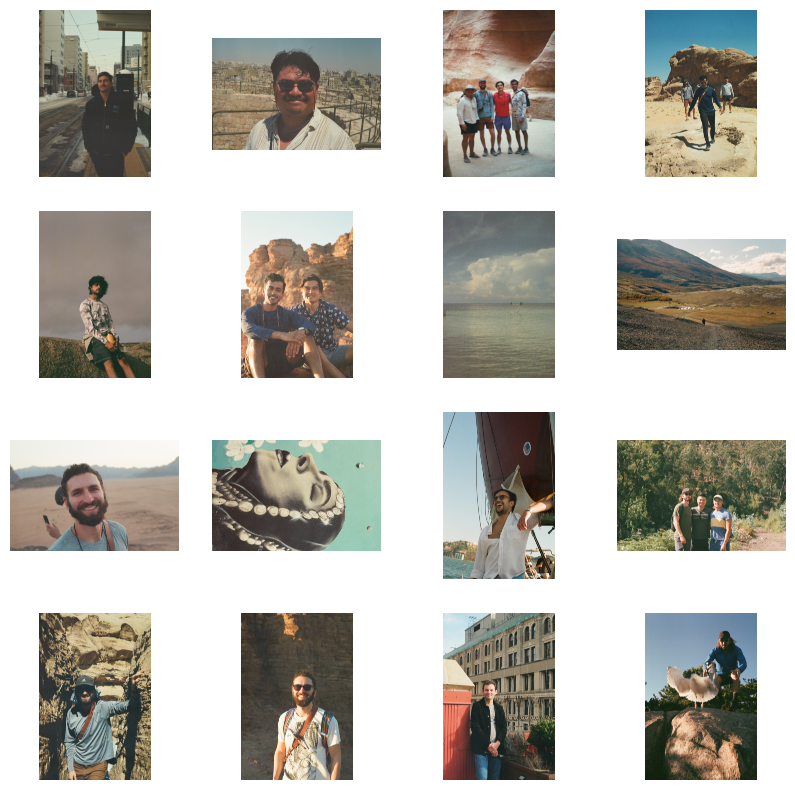

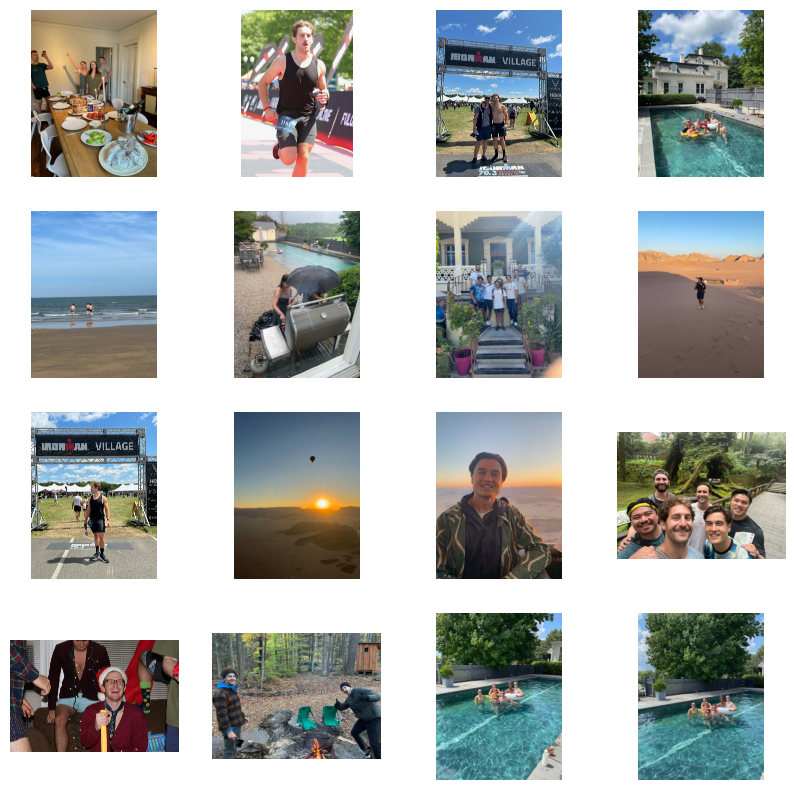

In [9]:
film_paths = "/Users/cody_schiffer/Personal_Projects/filmify!/film_photos"
film_paths = glob.glob(film_paths + "/*.jpeg") # Grabbing all the image file names

_, axes = plt.subplots(4, 4, figsize=(10, 10))
for ax, img_path in zip(axes.flatten(), film_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")

digital_paths = "/Users/cody_schiffer/Personal_Projects/filmify!/digital_photos"
digital_paths = glob.glob(digital_paths + "/*.jpeg")

_, axes = plt.subplots(4, 4, figsize=(10, 10))
for ax, img_path in zip(axes.flatten(), digital_paths):
    ax.imshow(Image.open(img_path))
    ax.axis("off")

split_scheme = (.80,.10,.10)
film_train, film_val, film_test = dataset_splitting(film_paths, split_scheme)
digital_train, digital_val, digital_test = dataset_splitting(digital_paths, split_scheme)



In [ ]:
#Implementing image transformations to expand images we are using